In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preparing Google Drive
Run the code below to give the Colab notebook access to your own personal Google Drive. Throughout the workshop, we will make use of data stored in a separate folder. To make sure the path to the data is correct, you will need to change your working folder to the "SACAC-EDA-2024 - Setup and Test" folder that you have copied to your Drive. An example is given below - make sure to change the path to match the path on your own drive. It should start with "/content/drive/"

In [15]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/SACAC-EDA-2024 - Setup and Test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/SACAC-EDA-2024 - Setup and Test


## Test data handling and plotting
Load a data file using `pandas` and plot using `seaborne`

,x1,x2
count,3000.000000,3000.000000
mean,0.016008,2.484585
std,1.067382,2.159908
min,-1.993974,-1.551183
25%,-0.991901,-0.190361
50%,0.059023,3.767196
75%,1.008156,4.081946
max,1.997729,5.115426


<Axes: xlabel='x1', ylabel='x2'>

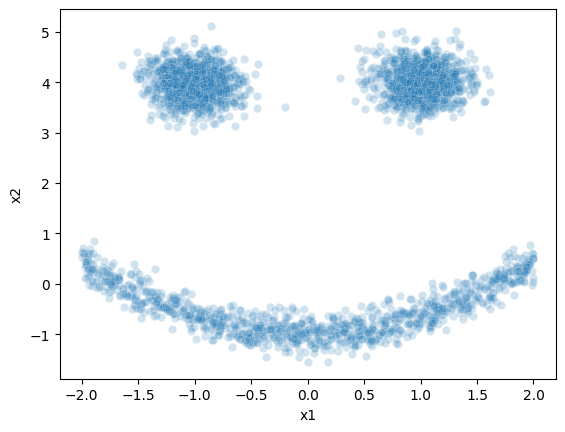

In [16]:
df = pd.read_csv('./data/test-data.csv')
display(df.describe())
sns.scatterplot(data = df, x = 'x1', y = 'x2', alpha = 0.2)

## Test popular machine learning library
Cluster the data using `KMeans` from [scikit-learn](https://scikit-learn.org/stable/index.html)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='x1', ylabel='x2'>

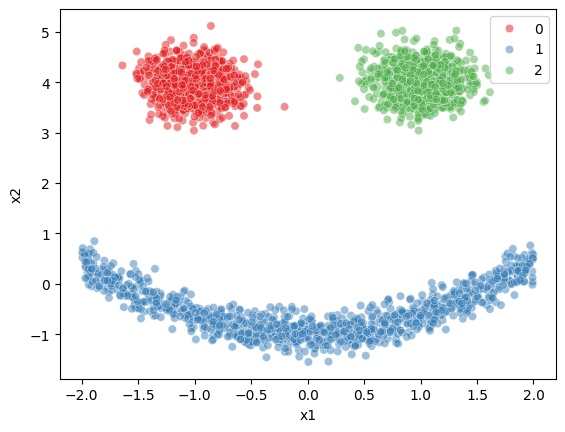

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = kmeans.labels_, palette = 'Set1', alpha = 0.5)

## Test popular deep learning library
Train an autoencoder using [keras](https://keras.io/)

Epoch 1/50
188/188 [==============================] - 5s 7ms/step - loss: 0.8327
Epoch 2/50
188/188 [==============================] - 2s 10ms/step - loss: 0.6212
Epoch 3/50
188/188 [==============================] - 3s 17ms/step - loss: 0.5329
Epoch 4/50
188/188 [==============================] - 2s 10ms/step - loss: 0.5247
Epoch 5/50
188/188 [==============================] - 1s 6ms/step - loss: 0.5095
Epoch 6/50
188/188 [==============================] - 1s 5ms/step - loss: 0.5064
Epoch 7/50
188/188 [==============================] - 1s 5ms/step - loss: 0.5179
Epoch 8/50
188/188 [==============================] - 1s 6ms/step - loss: 0.5206
Epoch 9/50
188/188 [==============================] - 1s 5ms/step - loss: 0.5019
Epoch 10/50
188/188 [==============================] - 1s 5ms/step - loss: 0.5046
Epoch 11/50
188/188 [==============================] - 1s 6ms/step - loss: 0.5071
Epoch 12/50
188/188 [==============================] - 1s 6ms/step - loss: 0.5021
Epoch 13/50
188/188 [=

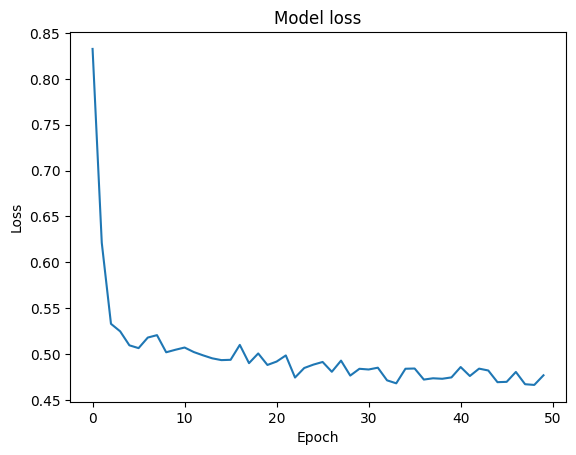

94/94 [==============================] - 0s 2ms/step


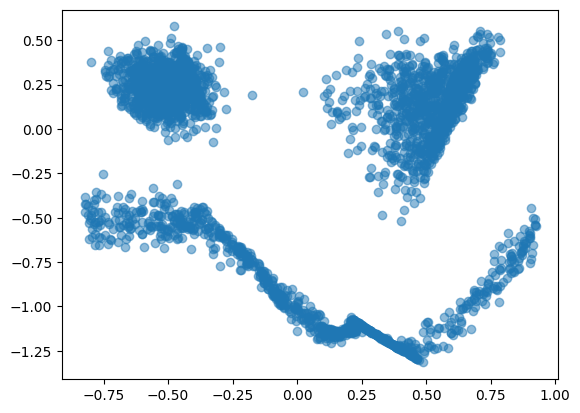

In [19]:
from sklearn.preprocessing import StandardScaler
import keras

Z = StandardScaler().fit_transform(df)
aeEncoder = keras.Sequential([
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu',),
    keras.layers.Dense(2, activation='tanh'),
])

aeDecoder = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(Z.shape[1])
])

# Autoencoder (combined model)
autoencoder = keras.Sequential([
    keras.layers.Input(shape=(Z.shape[1],)),
    aeEncoder,
    aeDecoder
])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(Z, Z, epochs=50, batch_size=16)
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Z_reconstructed = autoencoder.predict(Z)
plt.scatter(Z_reconstructed[:,0], Z_reconstructed[:,1], alpha = 0.5)